# Forest Fires Prediction
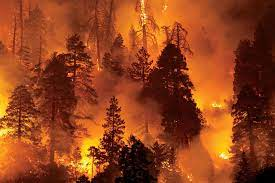

#### About dataset:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007
   
3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, 
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)
   
   In the above reference, the output "area" was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority. 
 
4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517 

6. Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

8. Missing Attribute Values: None


## Importing nassaries liebries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



## Read dataset

In [2]:
df = pd.read_csv(r"/kaggle/input/forest-fires-prediction/forest_fires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
## checking the dataset size
df.shape

(517, 13)

In [4]:
# check duplicate
df.duplicated().sum()

4

In [5]:
# remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
# check the null values 
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
# check the about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    object 
 3   day     513 non-null    object 
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 56.1+ KB


In [8]:
# dataset describe by statical teckniques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,513.0,4.678363,2.320059,1.0,3.0,4.00,7.00,9.00
Y,513.0,4.300195,1.230925,2.0,4.0,4.00,5.00,9.00
FFMC,513.0,90.637427,5.540920,18.7,90.2,91.60,92.90,96.20
DMC,513.0,110.989279,64.191013,1.1,68.6,108.30,142.40,291.30
DC,513.0,549.155166,247.724594,7.9,440.9,664.50,713.90,860.60
ISI,513.0,9.023587,4.575543,0.0,6.4,8.40,11.00,56.10
temp,513.0,18.887524,5.828128,2.2,15.5,19.30,22.80,33.30
RH,513.0,44.348928,16.358803,15.0,33.0,42.00,53.00,100.00
wind,513.0,4.010526,1.796613,0.4,2.7,4.00,4.90,9.40
rain,513.0,0.021832,0.297107,0.0,0.0,0.00,0.00,6.40


## Data visualization

### Histogram:
A histogram is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size.

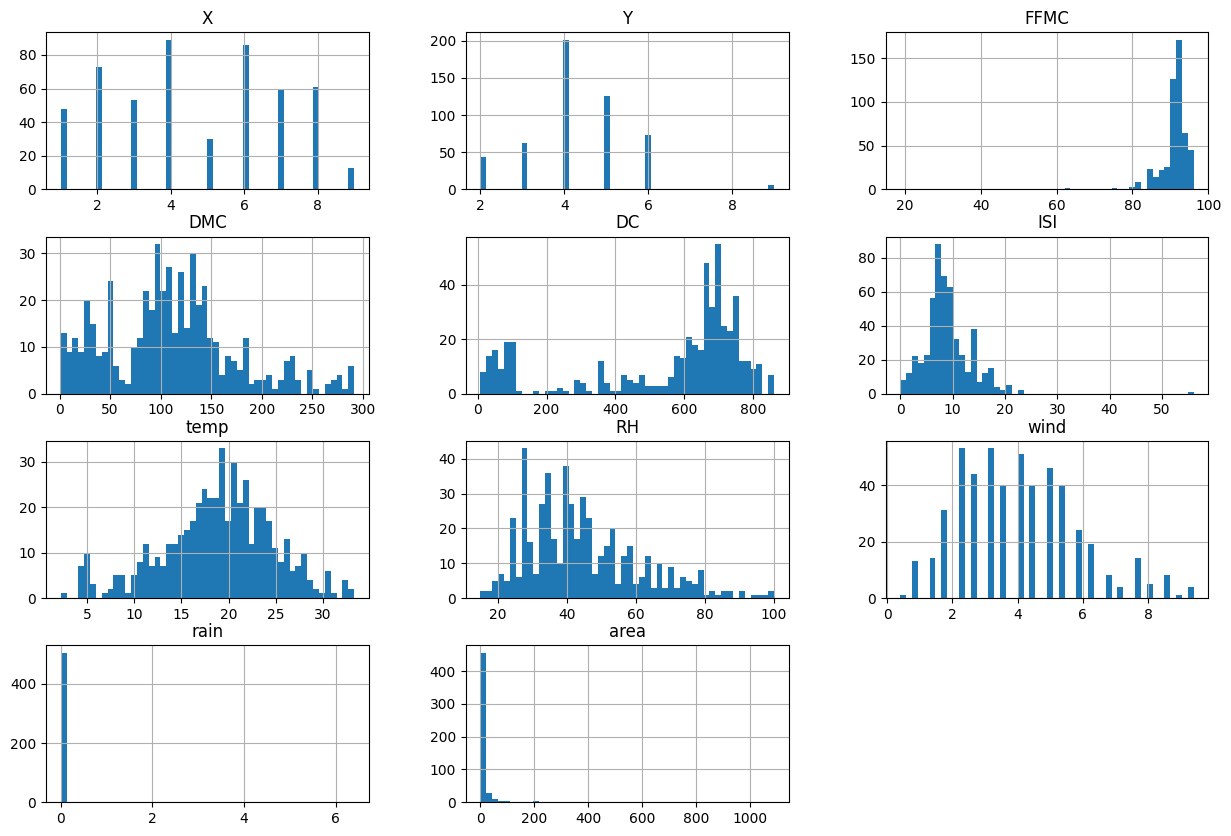

In [9]:
df.hist(bins=50,figsize=(15,10))
plt.show()

<AxesSubplot: xlabel='month', ylabel='count'>

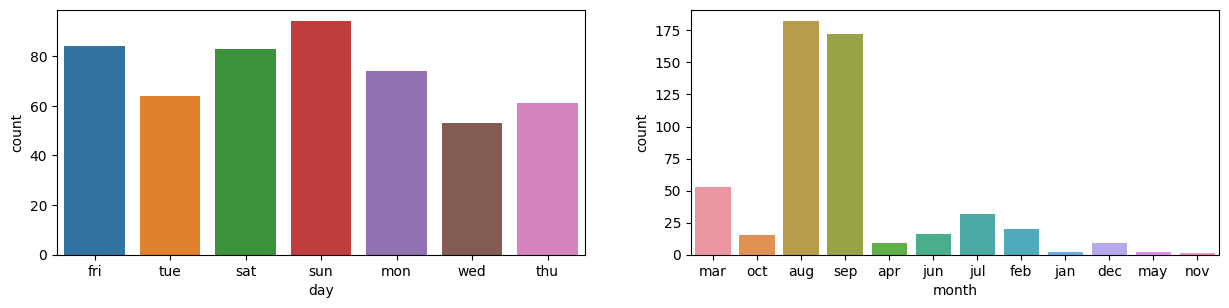

In [10]:
# visualisation catericale header
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(data=df,x='day')
plt.subplot(2,2,2)
sns.countplot(data=df,x='month')

## Observation:

1. mostly forest fire day are sunday and sat,friday.
2. mostly forest fire months are aug and sep.

In [11]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

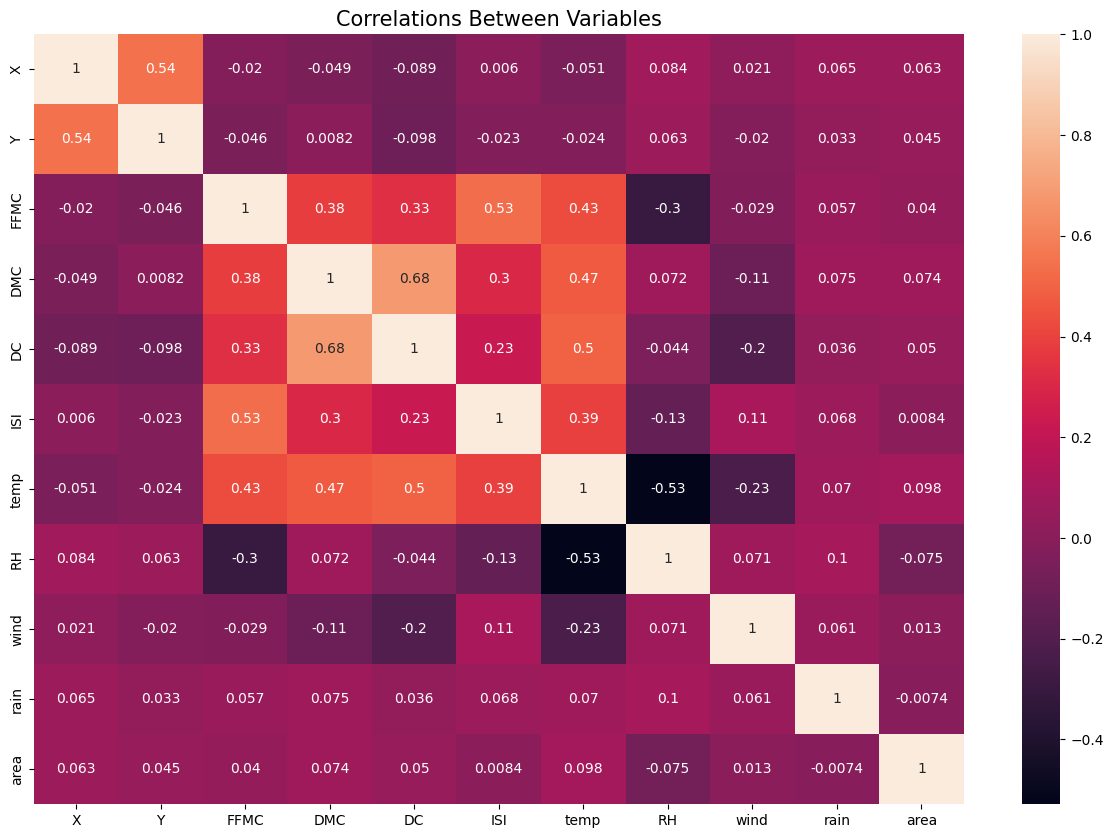

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

## observation:¶
Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.

Insight, the correlation is. The negative correlation. It ranges from -0.02 to -0.04.

In [13]:
df.corr()["area"].sort_values(ascending=False)

area    1.000000
temp    0.098222
DMC     0.073783
X       0.062930
DC      0.050313
Y       0.045168
FFMC    0.040232
wind    0.012699
ISI     0.008411
rain   -0.007418
RH     -0.075460
Name: area, dtype: float64

## data preprocessing

In [14]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
# checking months apply uniques funtion
df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [16]:
# checking day apply uniques funtion
df["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [17]:
# convert categrical  to numeric
df["month"] = df["month"].replace({'mar':3 ,'oct':10, 'aug':8, 'sep':9, 'apr':4, 'jun':6, 'jul':7, 'feb':2, 'jan':1,
       'dec':12, 'may':5, 'nov':11})

In [18]:
# convert categrical  to numeric
df["day"] = df["day"].replace({'fri':5, 'tue':2, 'sat':6, 'sun':7, 'mon':1, 'wed':3, 'thu':4})

In [19]:
df.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


## x,y spliting

In [20]:
## difinde independed varible and depended varible
x= df.iloc[:,:-1]
y = df["area"]

## Train Test split

In [21]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=43)
print(xtrain.shape)
print(xtest.shape)

(410, 12)
(103, 12)


## Feature Scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [23]:
xtrain.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.625,0.428571,0.727273,0.166667,0.944516,0.381116,0.893927,0.115865,0.607717,0.235294,0.255556,0.0
1,0.750,0.285714,0.636364,1.000000,0.938065,0.486906,0.695524,0.188948,0.575563,0.282353,0.555556,0.0
2,0.000,0.285714,0.727273,0.000000,0.939355,0.444521,0.937155,0.133690,0.614148,0.235294,0.200000,0.0
3,1.000,0.428571,0.454545,0.333333,0.962581,0.166782,0.338776,0.249554,0.829582,0.223529,0.455556,0.0
4,0.125,0.285714,0.727273,0.333333,0.892903,0.288422,0.840832,0.065954,0.630225,0.223529,0.200000,0.0


In [24]:
xtest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.375,0.142857,0.727273,1.000000,0.926452,0.329428,0.870668,0.203209,0.585209,0.470588,0.5,0.0
1,0.875,0.428571,0.818182,0.000000,0.854194,0.109235,0.769294,0.053476,0.466238,0.376471,0.5,0.0
2,0.000,0.142857,0.727273,1.000000,0.950968,0.423846,0.788676,0.151515,0.697749,0.200000,0.7,0.0
3,0.750,0.428571,0.636364,0.166667,0.998710,0.620262,0.777517,0.254902,0.807074,0.564706,0.5,6.4
4,0.375,0.428571,0.181818,0.666667,0.935484,0.162646,0.103959,0.222816,0.437299,0.141176,0.8,0.0


## model building nerual network

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [26]:
nn = Sequential()

In [27]:
nn.add(Dense(128,input_dim=xtrain.shape[1],activation="relu"))
nn.add(Dense(64,activation="relu"))
nn.add(Dense(32,activation="relu"))
nn.add(Dense(1,activation="linear"))

In [28]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stop = EarlyStopping(monitor="val_loss",patience=10)

In [30]:
nn.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [31]:
hist = nn.fit(xtrain,ytrain,validation_split=0.2,epochs=100,callbacks=[early_stop])

Epoch 1/100
11/11 [==============================] - 1s 27ms/step - loss: 6057.4087 - mae: 14.4158 - val_loss: 1429.0748 - val_mae: 12.3334
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 6031.5166 - mae: 14.4740 - val_loss: 1401.0518 - val_mae: 12.4713
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 5987.4346 - mae: 14.7469 - val_loss: 1359.3914 - val_mae: 12.9349
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 5930.8418 - mae: 15.7335 - val_loss: 1308.5006 - val_mae: 14.2424
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 5879.3848 - mae: 17.9246 - val_loss: 1275.3882 - val_mae: 17.0994
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 5840.4229 - mae: 20.1044 - val_loss: 1274.0530 - val_mae: 18.4318
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 5840.6328 - mae: 21.7314 - val_loss: 1278.7355 - val_mae: 19.7218
Epoch 8/100
11/11 [=======

## Visualazation lerning curve

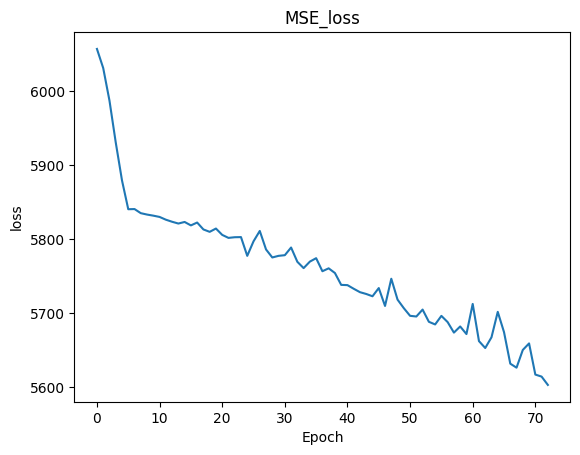

In [32]:
plt.plot(hist.history["loss"])
plt.title("MSE_loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

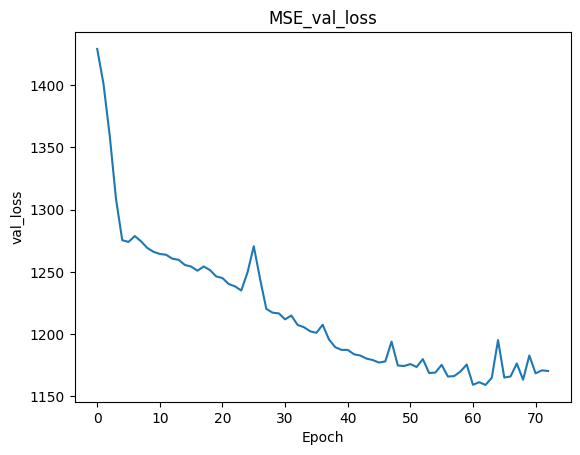

In [33]:
plt.plot(hist.history["val_loss"])
plt.title("MSE_val_loss")
plt.xlabel("Epoch")
plt.ylabel("val_loss")
plt.show()

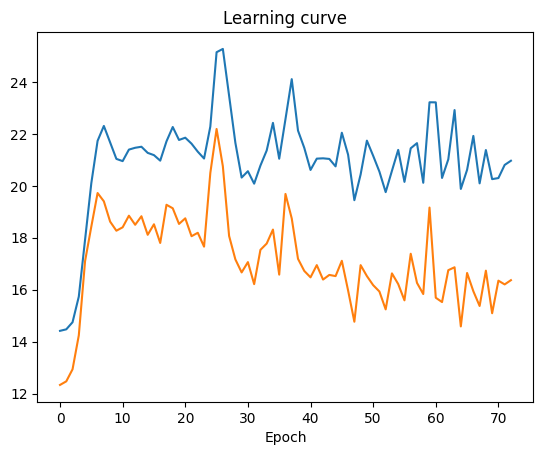

In [34]:
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.show()

## evalueted

In [35]:
nn.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 4704.6284 - mae: 20.1739


[4704.62841796875, 20.173931121826172]

In [36]:
nn.evaluate(xtest,ytest)

4/4 [==============================] - 0s 3ms/step - loss: 761.1240 - mae: 15.7222


[761.1240234375, 15.722197532653809]

## prediction

In [37]:
train = nn.predict(xtrain)
test = nn.predict(xtest)

4/4 [==============================] - 0s 2ms/step


## sklern metrix

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mae = mean_absolute_error(ytest,test)
mse = mean_squared_error(ytest,test)
rmse = np.sqrt(mse)
r2_score = r2_score(ytest,test)


print("mae:",round(mae,2))
print("mse:",round(mse,2))
print("rmse:",round(rmse,2))
print("r2_score:",round(np.sqrt(-r2_score),2))

mae: 15.72
mse: 761.12
rmse: 27.59
r2_score: 0.59
